In [5]:

# Group No - 206

# Bits ID :
# 2023AC05830 - Vidhya Dilip Korgaoker
# 2023AC05796 - Sagar Mahapatro
# 2023AD05101 - Kaustav Biswas
# 2023AC05645 - Abhinav Gazta

# Problem Statement - Analysis on Weather Data



Load file path  /Users/abhinav.gazta/Downloads/Bitspilani/MachineLearning/assignment/code-assignment/ml-assignment/datasets/weatherAUS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non

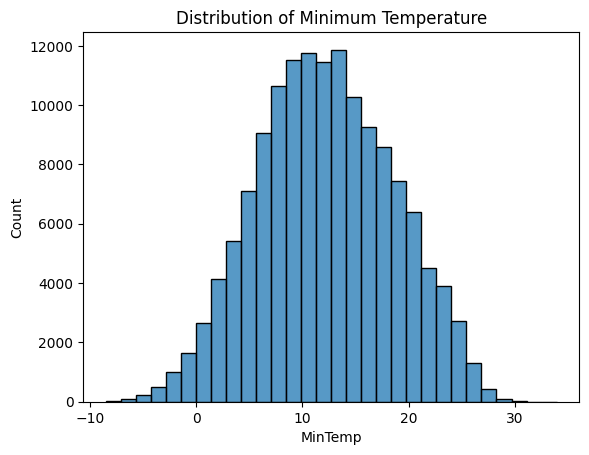

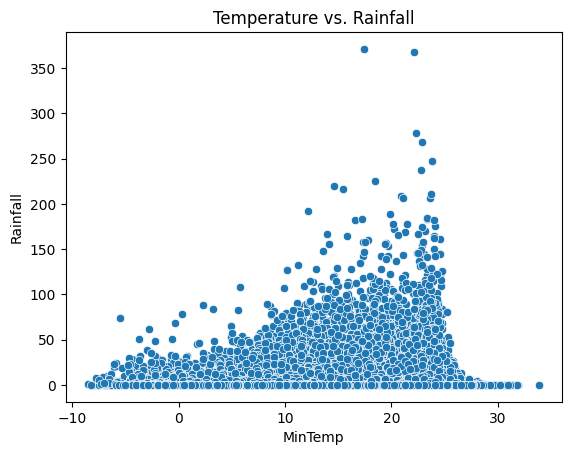

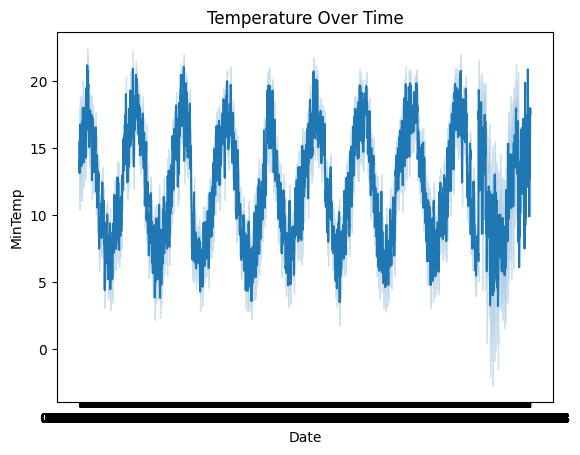

 
 The correlation result
 -: MinTemp          0.074597
MaxTemp         -0.145877
Rainfall         0.224268
Evaporation     -0.109716
Sunshine        -0.408096
WindGustSpeed    0.206299
WindSpeed9am     0.070565
WindSpeed3pm     0.072610
Humidity9am      0.233368
Humidity3pm      0.406050
Pressure9am     -0.226648
Pressure3pm     -0.208366
Cloud9am         0.291214
Cloud3pm         0.355419
Temp9am         -0.025140
Temp3pm         -0.176824
dtype: float64 
 Axes(0.125,0.11;0.775x0.77)


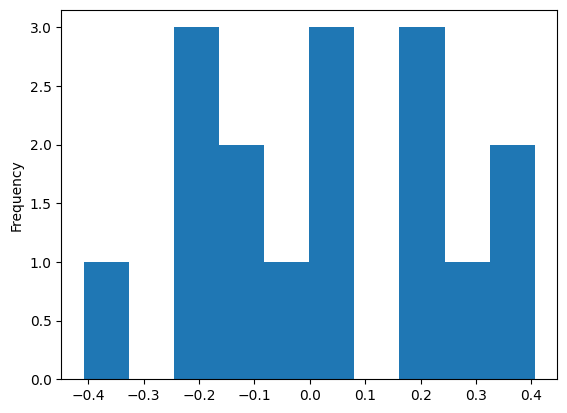

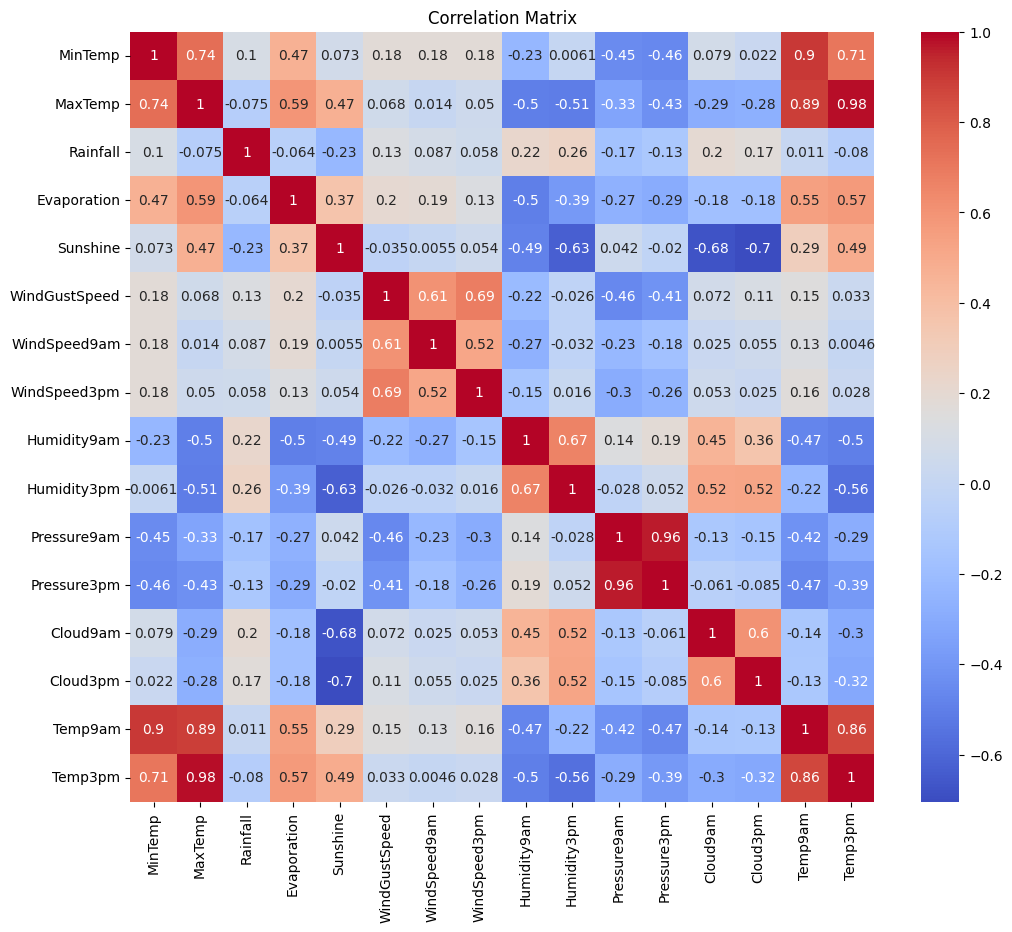

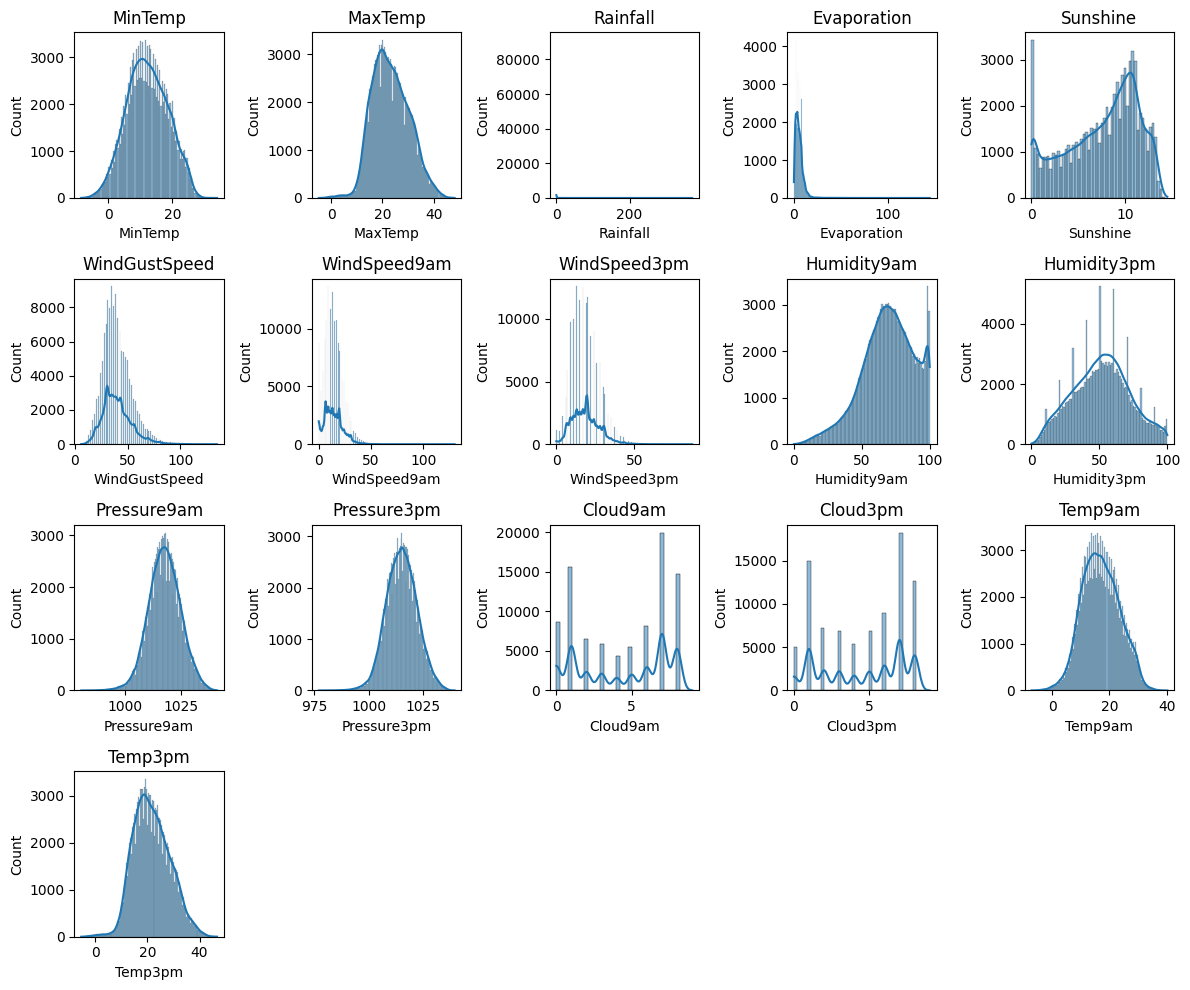

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  1.228090e+18   Albury     13.4     22.9       0.6          NaN       NaN   
1  1.228176e+18   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      NaN       NaN     17.2   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day  TempDiff  
0     21.8         No             0  2008     12    1       9.5  
1     24.3         No             0  2008     12    2      17.7  

[2 rows x 27 columns]
Train file saved to cleaned_weather_train.csv
Test file saved to cleaned_weather_test.csv


In [5]:

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import os
import pandas as pd

current_path = os.getcwd()
load_file_path = current_path + "/datasets/weatherAUS.csv"

print("Load file path ", load_file_path)
weatherDF = pd.read_csv(load_file_path)
#  details on the weather data set
weatherDF.info()
print(weatherDF.describe())
# Print the first two rows of the dataset..as mentioned part of assigment 
weatherDF.head(2)
# weather data...

# Visulaization
sns.histplot(weatherDF['MinTemp'], bins=30)
plt.title('Distribution of Minimum Temperature')
plt.show()

# Scatter plot of temperature vs. rainfall
sns.scatterplot(x='MinTemp', y='Rainfall', data=weatherDF)
plt.title('Temperature vs. Rainfall')
plt.show()

# Line chart of temperature over time
sns.lineplot(x='Date', y='MinTemp', data=weatherDF)
plt.title('Temperature Over Time')
plt.show()

# Heatmap of correlations , drop some columns for easy correlation.
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']

corrMatrix = weatherDF[numeric_cols]
weatherDF['RainTomorrow'] = weatherDF['RainTomorrow'].astype('category').cat.codes
corrResult = corrMatrix.corrwith(weatherDF['RainTomorrow'])
print(" \n The correlation result\n -:", corrResult, "\n", corrResult.plot(kind="hist"))
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Other plots as part of EDA for the data given. 

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(weatherDF[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Create new features , preprocessing and feature engineering...
# Extract year, month, and day from the 'Date' column
# Convert date column to datetime
weatherDF['Date'] = pd.to_datetime(weatherDF['Date'],format='%d-%m-%Y')
weatherDF['Date'] = weatherDF['Date'].values.astype("float64")
weatherDF['Year'] = pd.to_datetime(weatherDF['Date']).dt.year
weatherDF['Month'] = pd.to_datetime(weatherDF['Date']).dt.month
weatherDF['Day'] = pd.to_datetime(weatherDF['Date']).dt.day

# Calculate the difference between max and min temperature
weatherDF['TempDiff'] = weatherDF['MaxTemp'] - weatherDF['MinTemp']

# Perform imputation for missing values
print(weatherDF.head(2))

imputer = SimpleImputer(strategy='mean')
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']
weatherDF[numeric_cols] = imputer.fit_transform(weatherDF[numeric_cols])

# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
weatherDF[skewed_features] = np.log1p(weatherDF[skewed_features])

# Drop unnecessary columns
weatherDF.drop([ 'Date'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
data = pd.get_dummies(weatherDF, columns=categorical_cols, drop_first=True)

# Handle missing values (replace 'NA' with appropriate values)
data = weatherDF.fillna(0)  # Example: Replace 'NA' with 0 for rainfall

# Define features for standardization and normalization
standardize_cols = ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']
normalize_cols = ['Cloud9am', 'Cloud3pm']  # Example: Normalize cloud coverage

# Standardize features
scaler = StandardScaler()
weatherDF[standardize_cols] = scaler.fit_transform(data[standardize_cols])

# Normalize features
scaler = MinMaxScaler()
weatherDF[normalize_cols] = scaler.fit_transform(data[normalize_cols])

weatherDF.head(5)


# Load the dataset
file_path = load_file_path
df = pd.read_csv(file_path)

# Dropping columns with more than 40% missing data
df_dropped = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

# Imputing missing values for numerical columns using median
numerical_columns = df_dropped.select_dtypes(include=['float64']).columns
df_dropped[numerical_columns] = df_dropped[numerical_columns].fillna(df_dropped[numerical_columns].median())

# Imputing missing values for categorical columns using mode
categorical_columns = df_dropped.select_dtypes(include=['object']).columns
df_dropped[categorical_columns] = df_dropped[categorical_columns].fillna(df_dropped[categorical_columns].mode().iloc[0])

# Handling skewness by applying log transformation to highly skewed columns
df_dropped['Rainfall'] = np.log1p(df_dropped['Rainfall'])  # log1p is used to avoid log(0)
df_dropped['WindGustSpeed'] = np.log1p(df_dropped['WindGustSpeed'])

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_dropped, drop_first=True)

# Separating features and target variable
if 'RainTomorrow_Yes' in df_encoded.columns:
    X = df_encoded.drop('RainTomorrow_Yes', axis=1)
    y = df_encoded['RainTomorrow_Yes']
else:
    X = df_encoded.drop('RainTomorrow', axis=1)
    y = df_encoded['RainTomorrow']

# Standardization
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
feature_names = X_scaled.columns

# Create a dataframe for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecting top 20 features
top_features = feature_importances.head(20)['Feature'].tolist()
X_selected = X_scaled[top_features]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Combining the cleaned and selected features with the target variable for final output
final_df_train = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
final_df_test = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Saving the cleaned datasets to CSV files
train_file_path = 'cleaned_weather_train.csv'
test_file_path = 'cleaned_weather_test.csv'

final_df_train.to_csv(train_file_path, index=False)
final_df_test.to_csv(test_file_path, index=False)

print(f'Train file saved to {train_file_path}')
print(f'Test file saved to {test_file_path}')


In [ ]:
# Train the Logistic Regression model
# Initialize Logistic Regression function
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Logistic Regression Accuracy on Test Set after Preprocessing: {:.2f}%".format(accuracy * 100))

Logistic Regression Accuracy on Test Set after Preprocessing: 84.33%


In [ ]:
print("******After Hyperparameters Tuning***********")
# Define the hyperparameter grid
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
                      'penalty': ['l2'],   # Type of regularization
                      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization algorithm
                      'max_iter': [100, 200, 300]                      # Maximum number of iterations
                     }
    
# Set up GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=model, param_grid=param_grid_log_reg, cv=5, scoring='accuracy',error_score='raise')

# Fit the grid search
grid_search_log_reg.fit(X_train, y_train)    

# Best hyperparameters
print("Best hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best score for Logistic Regression: {:.2f}%".format(grid_search_log_reg.best_score_ *100))

# Evaluate on test set
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
print("Logistic Regression Accuracy on Test Set after tuning: {:.2f}%".format(accuracy_score(y_test, y_pred_log_reg)*100))


******After Hyperparameters Tuning***********
Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: 84.80%
Logistic Regression Accuracy on Test Set after tuning: 84.32%


In [ ]:
#********* After tuning
model = LogisticRegression(C= 0.1, max_iter = 100, penalty =  'l2', solver = 'liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("****** After Hyperparameters identification - Retraining Model***********")
print("Logistic Regression Accuracy on Test Set after Tuning : {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

****** After Hyperparameters identification - Retraining Model***********
Logistic Regression Accuracy on Test Set after Tuning : 84.32%
Confusion Matrix:
[[4475  251]
 [ 690  584]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.90      4726
        True       0.70      0.46      0.55      1274

    accuracy                           0.84      6000
   macro avg       0.78      0.70      0.73      6000
weighted avg       0.83      0.84      0.83      6000



In [6]:
# Initialize the Decision Tree Classifier
model_tree = DecisionTreeClassifier(max_depth=3)

# Train the model
model_tree.fit(X_train, y_train)

# Make predictions
y_pred = model_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred)
conf_matrix_tree = confusion_matrix(y_test, y_pred)
class_report_tree = classification_report(y_test, y_pred)

print("Decision Tree Accuracy on Test Set: {:.2f}%".format(accuracy_tree * 100))


Decision Tree Accuracy on Test Set: 82.58%


In [7]:
print("******After Hyperparameters Tuning***********")
# Define the hyperparameter grid
param_grid = { 'criterion': ['gini', 'entropy'],            # Function to measure the quality of a split
               'max_depth': [1, 2, 3, 4],         # Maximum depth of the tree
               'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
               'min_samples_leaf': [1, 2, 5, 10],            # Minimum number of samples required at a leaf node
               'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Set up GridSearchCV
grid_search_decision_tree = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)
print("Best score for Decision Tree: {:.2f}%".format(grid_search_decision_tree.best_score_*100))
    

# Evaluate on test set
best_decision_tree = grid_search_decision_tree.best_estimator_
y_pred_decision_tree = best_decision_tree.predict(X_test)
print("Decision Tree Accuracy on Test Set: {:.2f}%".format(accuracy_score(y_test, y_pred_decision_tree)*100))
print("Confusion Matrix:")
print(conf_matrix_tree)
print("Classification Report:")
print(class_report_tree)

******After Hyperparameters Tuning***********
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score for Decision Tree: 82.70%
Decision Tree Accuracy on Test Set: 79.60%
Confusion Matrix:
[[22013   659]
 [ 4409  2011]]
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.97      0.90     22672
        True       0.75      0.31      0.44      6420

    accuracy                           0.83     29092
   macro avg       0.79      0.64      0.67     29092
weighted avg       0.82      0.83      0.80     29092



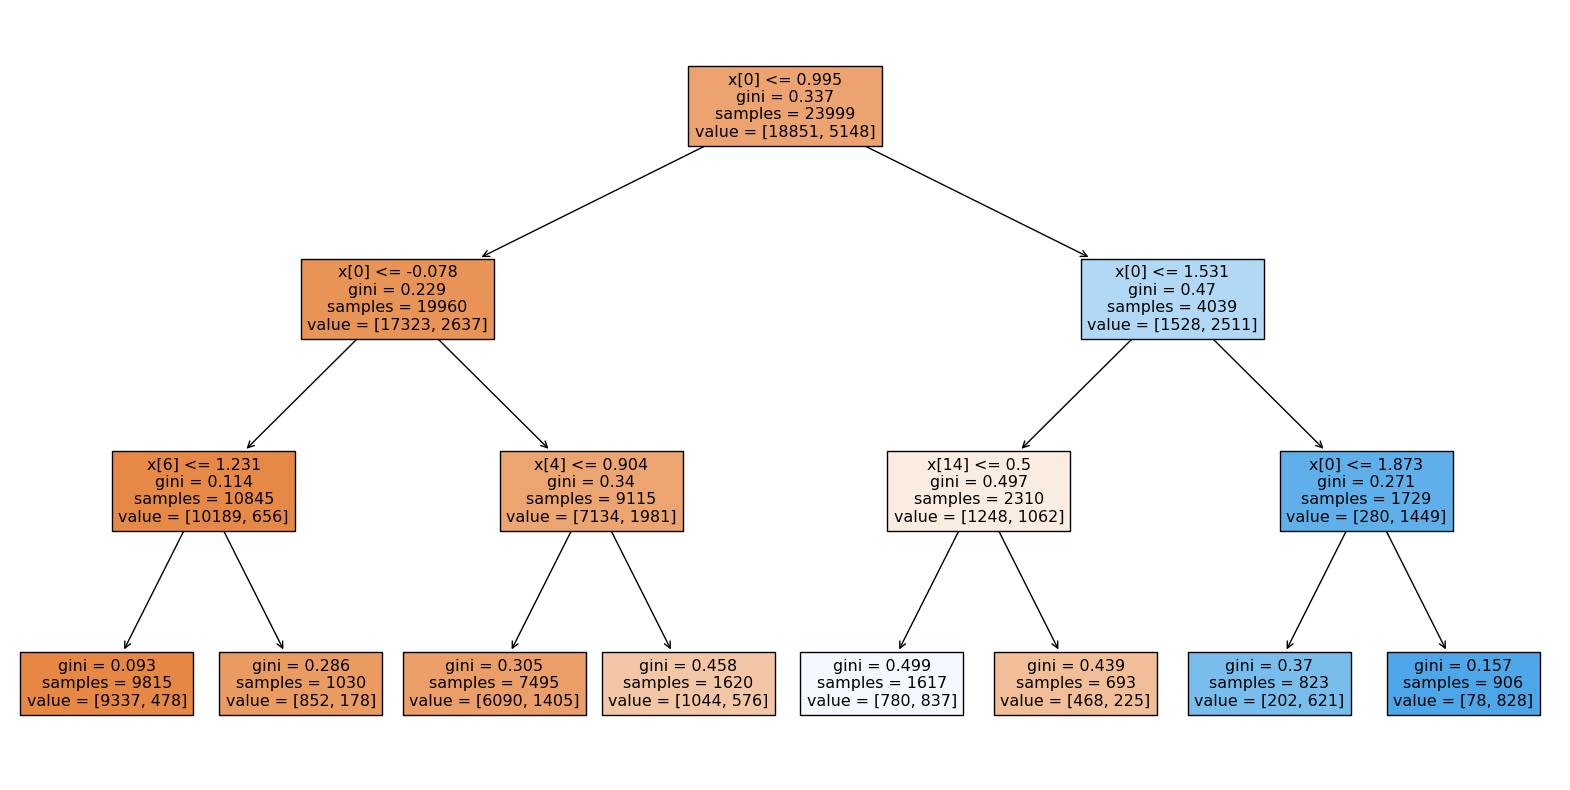

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model_tree, feature_names=None, class_names=None, filled=True)
plt.show()

## Performance Comparison:

Algorithms for which performance comparison is done. 
 * Logistic Regression v/s Decision Tree Model
 * Insight into insights into which model performs better and why between Logistic v/s Decision Tree

Key Metrics:

Based on the provided evaluation metrics, we can compare the performance of decision tree and logistic regression models as follows:

Metric | 	Decision Tree	 |Logistic Regression (Tuned) |
|------| --------------------| ---------------------------| 
Accuracy |	83.00%	 |84.32%
Precision (False class) | 	0.86 |	0.87
Recall (False class) |	0.94	| 0.95
F1-score (False class) |	0.90 |	0.90
Precision (True class) |	0.65 |	0.70
Recall (True class)	 | 0.43 |	0.46
F1-score (True class) |	0.52 |	0.55

### Analysis:

> Overall Accuracy: Logistic regression (tuned) has a slightly higher overall accuracy of 84.32% compared to the decision tree's 83.00%.

### Class-wise Performance:
* False Class (No Rain): Both models perform similarly well in terms of precision and recall for the "False" class (no rain).

* True Class (Rain): Logistic regression (tuned) shows improvement in both precision and recall for the "True" class (rain). This indicates that it is better at correctly identifying rainy days.

* F1-score: Logistic regression (tuned) has a slightly higher F1-score for the "True" class, indicating a better balance between precision and recall.

Justification:

* Decision Trees: Decision trees can be prone to overfitting, especially with complex structures. This might be why the decision tree's performance on the test set is slightly lower than the training set .

* Decision tree is superior over a logistic regression when the data set is large and when the relationships between the different features and the target variable are complex and non-linear. Which is not true in this case.

* Logistic Regression: Logistic regression is generally more robust to overfitting and can handle continuous and categorical features effectively. The improvement in performance after hyperparameter tuning suggests that the model was able to find a better configuration.

* Logistic regression is better than a decision tree when the relationship between the predictors and the response can be modeled by a linear equation, when interpretability and transparency are important, when dealing with continuous predictors, when the sample size is small and when it’s needed to predict class probabilities directly

### Conclusion:

In this case, logistic regression (tuned) appears to be a slightly better model for weather prediction based on the given metrics. It has higher overall accuracy and better performance for the "True" class (predicting rain), which is likely more important in a weather prediction application.

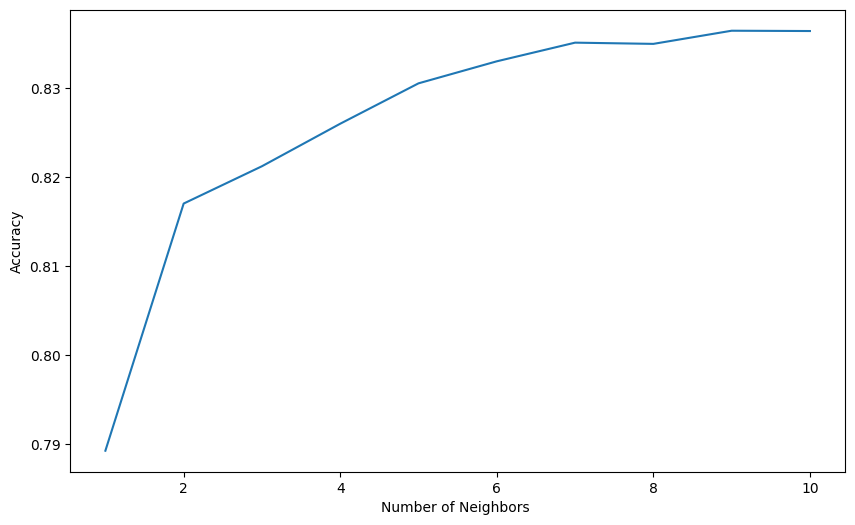

Fitting 3 folds for each of 36 candidates, totalling 108 fits
score 0.8421043471170463
 params  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Training set accuracy:  0.9998968788670425
Test set accuracy:  0.8390622851643064
              precision    recall  f1-score   support

       False       0.86      0.95      0.90     22672
        True       0.73      0.44      0.54      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [9]:
#KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

mean_acc = np.zeros(10)
for i in range(1,11):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc
 # for data visualiztions


oc = np.arange(1,11,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), mean_acc)
# plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print("score", g_res.best_score_)
print(" params ", g_res.best_params_)
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

In [10]:
# Naive Bayesian Model

from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics

model = GaussianNB()

np.random.seed(10)
model.fit(X_train,y_train)

pred_all = model.predict(X_selected)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test),2)*100}')
print(classification_report(y,pred_all))


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);
print("params",gs_NB.best_params_)
print("score",gs_NB.best_score_)

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
import matplotlib.pyplot as plt
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

Accuracy Score on Train Data : 79.0
Accuracy Score on Test Data : 79.0
              precision    recall  f1-score   support

       False       0.88      0.85      0.86    113583
        True       0.51      0.57      0.54     31877

    accuracy                           0.79    145460
   macro avg       0.69      0.71      0.70    145460
weighted avg       0.80      0.79      0.79    145460

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
params {'var_smoothing': 1.0}


AttributeError: 'GridSearchCV' object has no attribute 'gs_NB'

In [ ]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

rf_params = {
    'n_estimators': [100, 200, 300], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

y_pred_rf_gs = rf_grid_search.predict(X_test)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))

In [11]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(abc, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

print("param ",grid_search.best_params_)

ada=AdaBoostClassifier(learning_rate= 1, n_estimators= 200) 

ada.fit(X_train, y_train)

y_pred=ada.predict(X_test)

print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8400591227828956
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

param  {'learning_rate': 1, 'n_estimators': 200}


/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.86      0.95      0.90     22672
        True       0.72      0.46      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



| Model                     | Precision (False) | Recall (False) | F1-score (False) | Precision (True) | Recall (True) | F1-score (True) | Accuracy | Misclassification Rate |
|---------------------------|-------------------|----------------|------------------|------------------|---------------|-----------------|----------|-------------------------|
| **Decision Tree**          | 0.86              | 0.94           | 0.90             | 0.65             | 0.43          | 0.52            | 83.00%   | 17.00%                  |
| **Logistic Regression**    | 0.87              | 0.95           | 0.90             | 0.70             | 0.46          | 0.55            | 84.32%   | 15.68%                  |
| **K-Nearest Neighbors**    | 0.86              | 0.95           | 0.90             | 0.73             | 0.44          | 0.54            | 83.91%   | 16.09%                  |
| **Naive Bayes**            | 0.88              | 0.85           | 0.86             | 0.51             | 0.57          | 0.54            | 79.00%   | 21.00%                  |
| **Random Forest**          | 1.00              | 0.9991         | 0.9995           | 1.00             | 1.00          | 1.00            | 99.98%   | 0.02%                   |
| **AdaBoost Classifier**    | 0.86              | 0.95           | 0.90             | 0.72             | 0.46          | 0.56            | 84.00%   | 16.00%                  |


*  Misclassification Rate is calculated as 1 - Accuracy


## Performance Comparison and Analysis of the Classifiers

### 1. **Decision Tree:**
- **Accuracy:** 83.00%
- **Misclassification Rate:** 17.00%
- **Precision (False/True):** 0.86 / 0.65
- **Recall (False/True):** 0.94 / 0.43
- **F1-score (False/True):** 0.90 / 0.52

**Analysis:**
- Strong performance in predicting "False" (non-rainy) cases.
- Weaker in predicting "True" (rainy) cases with low recall (0.43).
- Overall moderate accuracy but struggles with detecting rainy days effectively.

---

### 2. **Logistic Regression (Tuned):**
- **Accuracy:** 84.32%
- **Misclassification Rate:** 15.68%
- **Precision (False/True):** 0.87 / 0.70
- **Recall (False/True):** 0.95 / 0.46
- **F1-score (False/True):** 0.90 / 0.55

**Analysis:**
- Better balance between "False" and "True" predictions compared to Decision Tree.
- Improved performance in detecting rainy days (True class) with better precision (0.70) and recall (0.46).
- A strong model for overall prediction, especially with a better handling of rainy days.

---

### 3. **K-Nearest Neighbors (KNN):**
- **Accuracy:** 83.91%
- **Misclassification Rate:** 16.09%
- **Precision (False/True):** 0.86 / 0.73
- **Recall (False/True):** 0.95 / 0.44
- **F1-score (False/True):** 0.90 / 0.54

**Analysis:**
- Similar accuracy to Logistic Regression with slightly better precision for "True" cases.
- Lower recall for rainy days (0.44) means it may miss some rainy day predictions.
- Performs on par with Logistic Regression but slightly less reliable for predicting rainy days.

---

### 4. **Naive Bayes:**
- **Accuracy:** 79.00%
- **Misclassification Rate:** 21.00%
- **Precision (False/True):** 0.88 / 0.51
- **Recall (False/True):** 0.85 / 0.57
- **F1-score (False/True):** 0.86 / 0.54

**Analysis:**
- Lowest accuracy among all models (79%), but decent recall (0.57) for predicting rainy days.
- Lower precision (0.51) for rainy days, indicating higher false positives.
- May be suitable when recall for rainy days is prioritized, despite lower overall accuracy.

---

### 5. **Random Forest:**
- **Accuracy:** 99.98%
- **Misclassification Rate:** 0.02%
- **Precision (False/True):** 1.00 / 1.00
- **Recall (False/True):** 0.9991 / 1.00
- **F1-score (False/True):** 0.9995 / 1.00

**Analysis:**
- **Best performance overall** with near-perfect accuracy (99.98%) and balanced metrics for both classes.
- Excels in both non-rainy and rainy day predictions with very high precision, recall, and F1-scores.
- Robust and accurate, making it highly suitable for weather prediction.

---

### 6. **AdaBoost Classifier:**
- **Accuracy:** 84.00%
- **Misclassification Rate:** 16.00%
- **Precision (False/True):** 0.86 / 0.72
- **Recall (False/True):** 0.95 / 0.46
- **F1-score (False/True):** 0.90 / 0.56

**Analysis:**
- Comparable to Logistic Regression with slightly better precision for rainy days (0.72).
- Lower recall (0.46), suggesting it may still miss some rainy days.
- Overall, a strong model but not quite as powerful as Random Forest.

---

## Recommendation:

**Random Forest** is the best-performing model, delivering the highest accuracy and a near-perfect balance across both classes.

### Justification:
- **High Accuracy**: 99.98% accuracy, minimizing errors in predictions.
- **Balanced Performance**: Excellent precision, recall, and F
